$\textbf{LVM Science case: NGC 253 deep field}$

Jan 31, 2022

Kathryn Kreckel, Enrico Congiu, Guillermo Blanc

In [11]:
import lvmetc_lco_script
import numpy as np
from astropy.table import Table


In [12]:
# writes out the config file
# all parameters take the default values, unless changed when calling this function
def write_config(filename = "test",outpref = "default", template = 'A0V_Pickles.dat', abmag = 23.5, 
                 tempfilter = 'sdss_g.dat', addline = 1, linelam = 6563.0, lineflux = 3e-18, linefwhm = 0.5, 
                 binspat = 1, binspec = 1, nmoon = 0, amass = 1.2,texp = 300,nexp = 3,aper = 4):
    with open(filename, "w") as out:
        out.write('outpref \t'+outpref+' \n')
        out.write('template \t'+ template + ' \n')
        out.write('abmag \t\t'+str(abmag) + '\n')
        out.write('tempfilter \t'+ tempfilter + '\n')
        out.write('addline \t'+ str(addline) + '\n')
        out.write('linelam \t'+str(linelam)+'\n')
        out.write('lineflux \t'+str(lineflux)+'\n')
        out.write('linefwhm \t'+str(linefwhm)+'\n')
        out.write('telescope \tLVM160 \n')
        out.write('binspat \t'+str(binspat)+'\n')
        out.write('binspec \t'+str(binspec)+'\n')
        out.write('nmoon \t\t'+str(nmoon)+'\n')
        out.write('amass \t\t'+str(amass)+'\n')
        out.write('dpsf \t\t0.6 \n')
        out.write('texp \t\t'+str(texp)+'\n')
        out.write('nexp \t\t'+str(nexp)+'\n')
        out.write('aper \t\t'+str(aper)+'\n')
    

Here we are determining an estimate of how deep we need to go to see the full extent of the outflow/wind in NGC 253

From notes with Enrico, while writing the MUSE proposal:
Existing narrowband imaging shows extended Halpha at an emission measure of 10pc/cm^6



This roughly corresponds to 2e-17 erg/cm^2/s/arcsec^2. From the image there is clearly outflow emission we still miss at this surface brightness. 

Say we want to trace the kinematics in the outflow. Then we need to achieve $\textbf{S/N=30}$, which is necessary to reach a 3σ precision in centroiding of 5 km/s. Alternately we could target the line widths, which imposes a requirement of $\textbf{S/N=40}$, which is necessary to reach a 3σ precision of 18 km/s with realistic uncertainties in the LSF (LVM Science Requirements Document v1.0; L1.1 & L1.2)

The S/N=40 requirement is achieved with 1200s x 6 exposures (2 hours on source, shorter than the "standard" 3h for LMC/SMC)

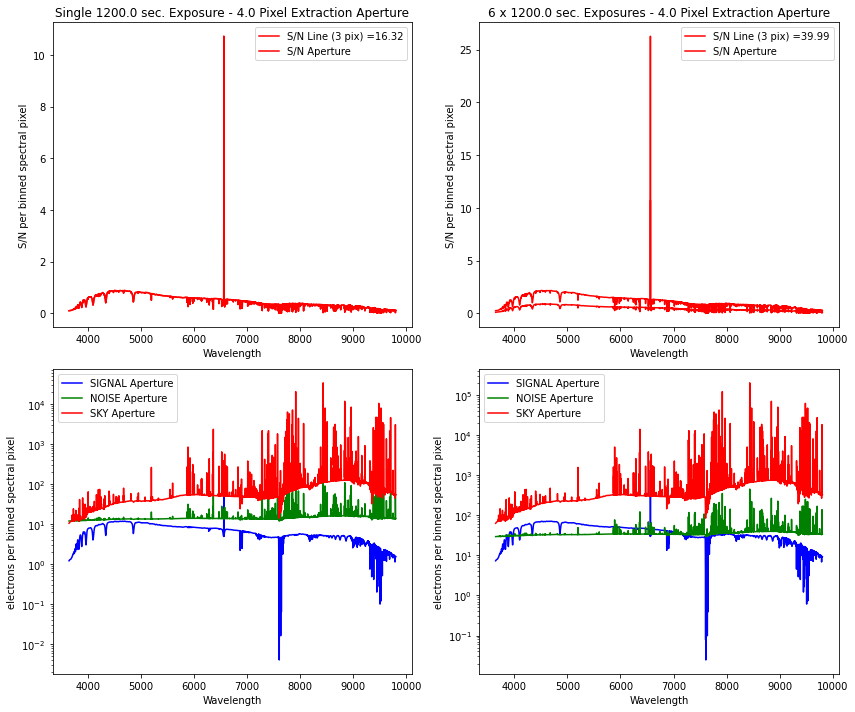

In [9]:
# ETC run targeting Halpha kinematics in the NGC 253 outflow
write_config(filename='config_NGC253_kin.txt',outpref='NGC253_kin',linelam=6563.0, lineflux=2e-17,
            texp=1200, nexp=3*2)
lvmetc_lco_script.run_lvmetc('config_NGC253_kin.txt')

If we want to go an order of magnitude deeper just to have the Halpha morphology, this is achieved at S/N=13 in an equivalent integration time of 1200s x 27 (9 hours, 3 times longer than 'normal' for the LMC/SMC):

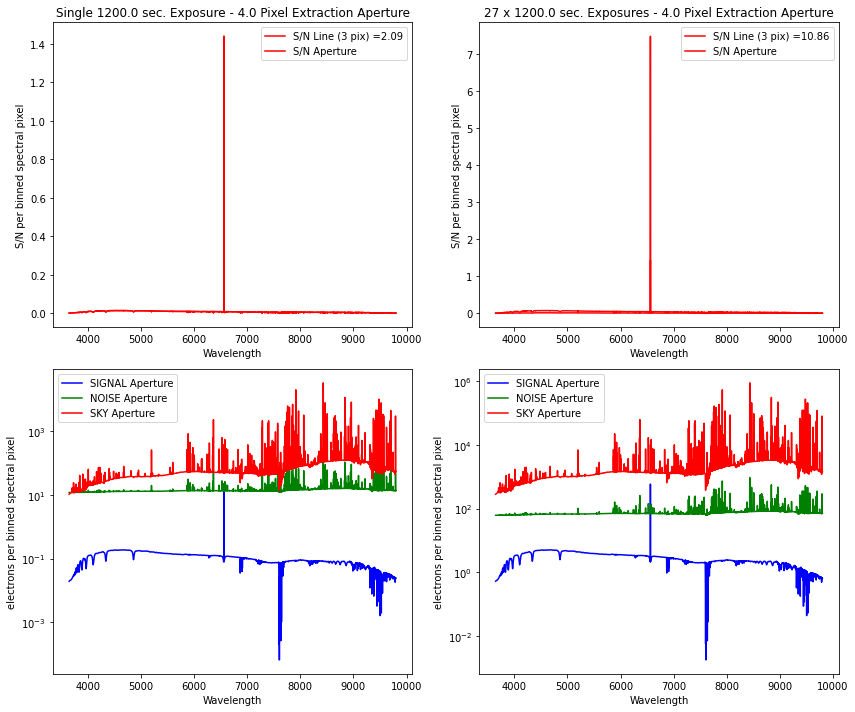

In [15]:
# ETC run targeting deep Halpha detections in the NGC 253 outflow
write_config(filename='config_NGC253_deep.txt',outpref='NGC253_deep',linelam=6563.0, abmag = 28.,lineflux=2e-18,
            texp=1200, nexp=9*3)
lvmetc_lco_script.run_lvmetc('config_NGC253_deep.txt')

The Halpha and FUV (Galex) emission are detected out to roughly 12' from the galaxy disk. This should be completely covered by a single LVM FOV.


Open questions
- what about other (fainter) emission lines in the wind? DIG line ratios off of the disk? 
- - At a S/N~13 in H$\alpha$, this becomes more feasible. [NII] and [SII] should be 0.3-0.5 fainter in the DIG, so detected at S/N>5
- what about stacking for much fainter (e.g. auroroal) lines?
- what kind of line centroiding can be achieved at S/N=13? Perhaps this is already sufficient for (bulk) kinematic studies?

